# Generative models

Grzegorz Statkiewicz, Mateusz Matukiewicz

## Setup

In [52]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
!nvidia-smi

Mon May 12 23:52:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.02              Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1660 Ti     On  |   00000000:1C:00.0  On |                  N/A |
|  0%   49C    P8             18W /  130W |    5374MiB /   6144MiB |     24%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [54]:
import torch

Select the device to use

In [55]:
device = torch.device("cuda") if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

print(f"Using device: {device}")

Using device: cuda


## Prepare the dataset and dataloaders

In [56]:
from torchvision import transforms

# train_mean = [0.3186241388320923, 0.2931755483150482, 0.3017965853214264]
# train_std = [0.2762017846107483, 0.2654302418231964, 0.2686000168323517]

train_mean = [0.5, 0.5, 0.5]
train_std = [0.5, 0.5, 0.5]


class ContrastStretch(object):
    def __call__(self, img):
        # img: Tensor [C,H,W] in [0,1]
        lo, hi = img.min(), img.max()
        return (img - lo) / (hi - lo + 1e-5)

transform = transforms.Compose([
    transforms.ToTensor(),
    ContrastStretch(),
    transforms.Normalize(mean=train_mean, std=train_std),
])

In [57]:
from torchvision.datasets import ImageFolder

train_dir = "./data/train"
train_ds = ImageFolder(train_dir, transform=transform)

num_classes = len(train_ds.classes)

print(f"Number of train images: {len(train_ds)}")
print(f"Number of train classes: {num_classes}")

Number of train images: 31367
Number of train classes: 43


In [58]:
from torch.utils.data import DataLoader

batch_size = 128

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

# VAE

## Create model

In [ ]:
from gnn import ConditionalVariationalAutoencoder as cVAE
from gnn import cVAETrainer
import torch.optim as optim
import torch.nn as nn


IMG_CHANNELS = 3
latent_dim = 100

# model
cvae_model = cVAE(IMG_CHANNELS, num_classes, latent_dim=latent_dim).to(device)
# vae_model = VAE(IMG_CHANNELS, latent_dim=latent_dim).to(device)

# optimizers
vae_optimizer = torch.optim.Adam(cvae_model.parameters(), lr=0.0001)
vae_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=vae_optimizer, gamma=0.99)

# trainer
# vae_trainer = cVAETrainer(
#     vae_model=vae_model,
#     optimizer=vae_optimizer,
#     scheduler=vae_scheduler,
#     latent_dim=latent_dim,
#     device=device
# )

cvae_trainer = cVAETrainer(
    vae_model=cvae_model,
    optimizer=vae_optimizer,
    num_classes=num_classes,
    scheduler=vae_scheduler,
    latent_dim=latent_dim,
    device=device
)

## Training

Epoch 0: 100%|██████████| 246/246 [00:22<00:00, 10.92it/s]


Epoch 1/20: Total Loss: 745.6938, Recon Loss: 717.6200, KLD Loss: 28.0738


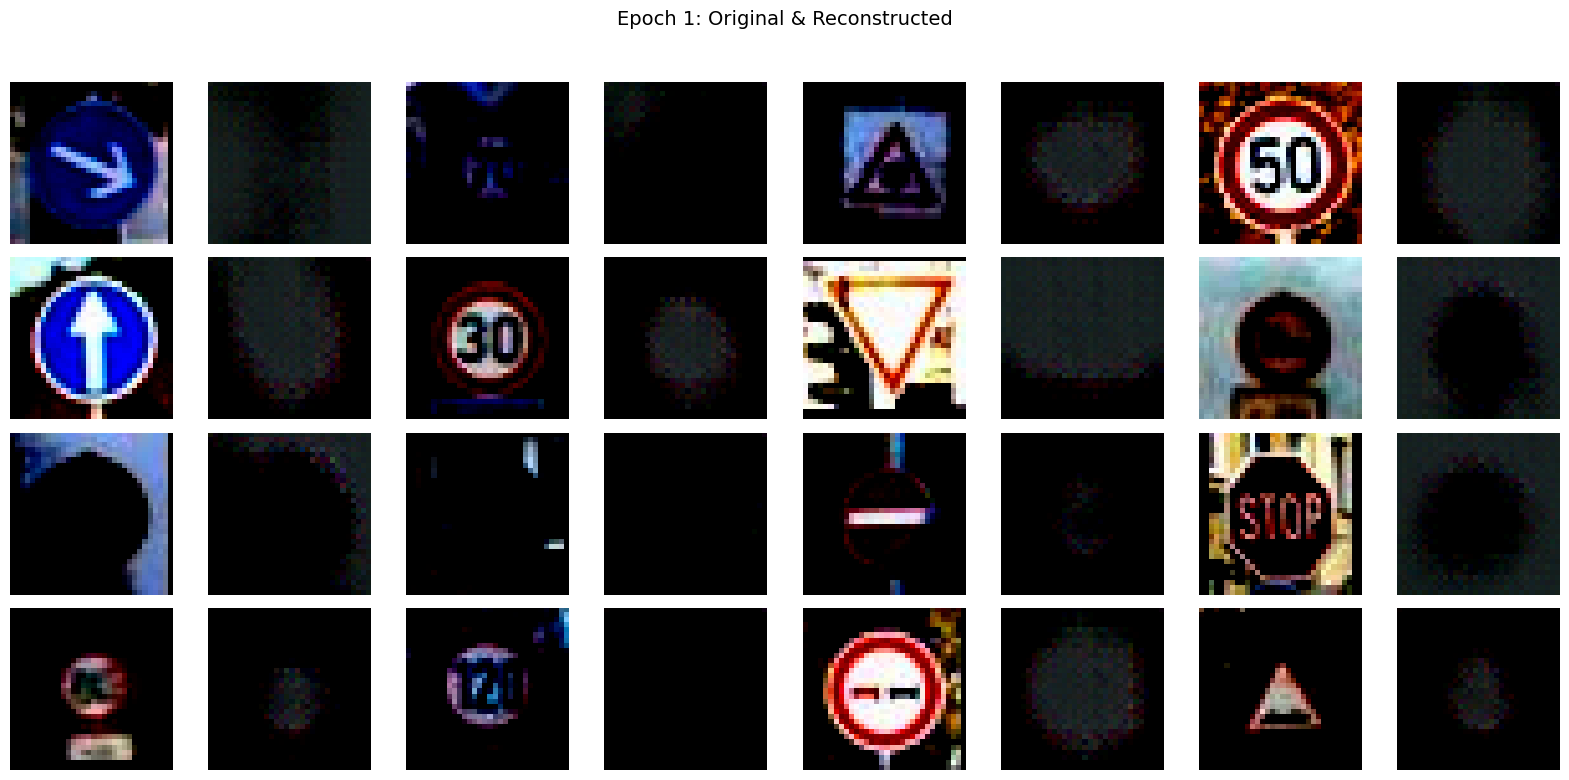

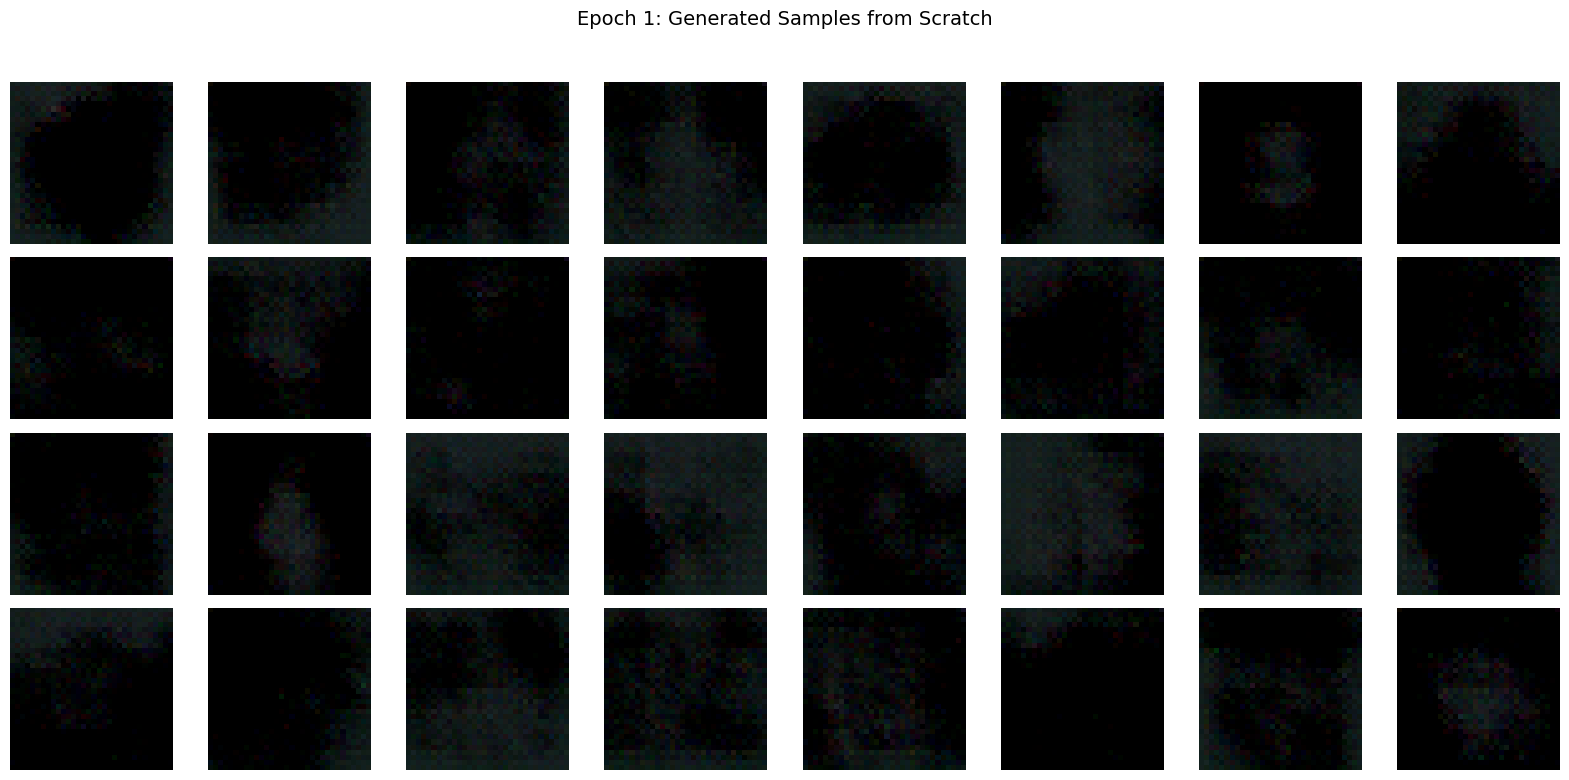

Epoch 1: 100%|██████████| 246/246 [00:20<00:00, 12.12it/s]


Epoch 2/20: Total Loss: 451.4918, Recon Loss: 411.4392, KLD Loss: 40.0527


Epoch 2: 100%|██████████| 246/246 [00:23<00:00, 10.37it/s]


Epoch 3/20: Total Loss: 364.9941, Recon Loss: 317.7529, KLD Loss: 47.2412


Epoch 3: 100%|██████████| 246/246 [00:22<00:00, 10.89it/s]


Epoch 4/20: Total Loss: 320.9224, Recon Loss: 270.6906, KLD Loss: 50.2318


Epoch 4: 100%|██████████| 246/246 [00:19<00:00, 12.70it/s]


Epoch 5/20: Total Loss: 290.7565, Recon Loss: 239.4490, KLD Loss: 51.3075


Epoch 5: 100%|██████████| 246/246 [00:21<00:00, 11.28it/s]


Epoch 6/20: Total Loss: 272.0425, Recon Loss: 221.0632, KLD Loss: 50.9794


Epoch 6: 100%|██████████| 246/246 [00:18<00:00, 13.01it/s]


Epoch 7/20: Total Loss: 258.0202, Recon Loss: 207.2097, KLD Loss: 50.8105


Epoch 7: 100%|██████████| 246/246 [00:21<00:00, 11.22it/s]


Epoch 8/20: Total Loss: 246.5867, Recon Loss: 196.0004, KLD Loss: 50.5862


Epoch 8: 100%|██████████| 246/246 [00:22<00:00, 11.13it/s]


Epoch 9/20: Total Loss: 236.9992, Recon Loss: 186.3508, KLD Loss: 50.6484


Epoch 9: 100%|██████████| 246/246 [00:19<00:00, 12.90it/s]


Epoch 10/20: Total Loss: 229.6674, Recon Loss: 178.8605, KLD Loss: 50.8069


Epoch 10: 100%|██████████| 246/246 [00:21<00:00, 11.29it/s]


Epoch 11/20: Total Loss: 223.5444, Recon Loss: 172.5828, KLD Loss: 50.9616


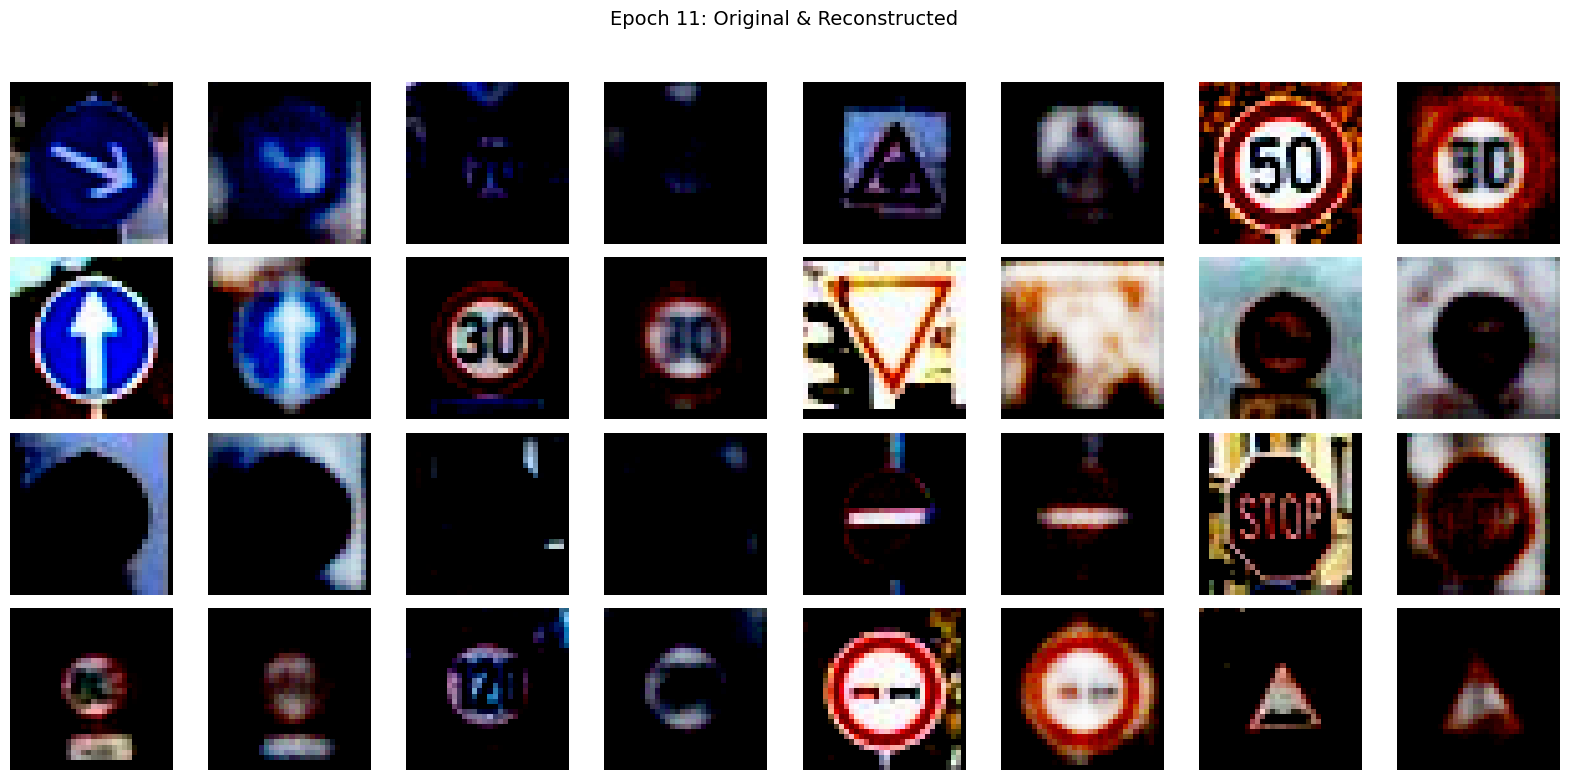

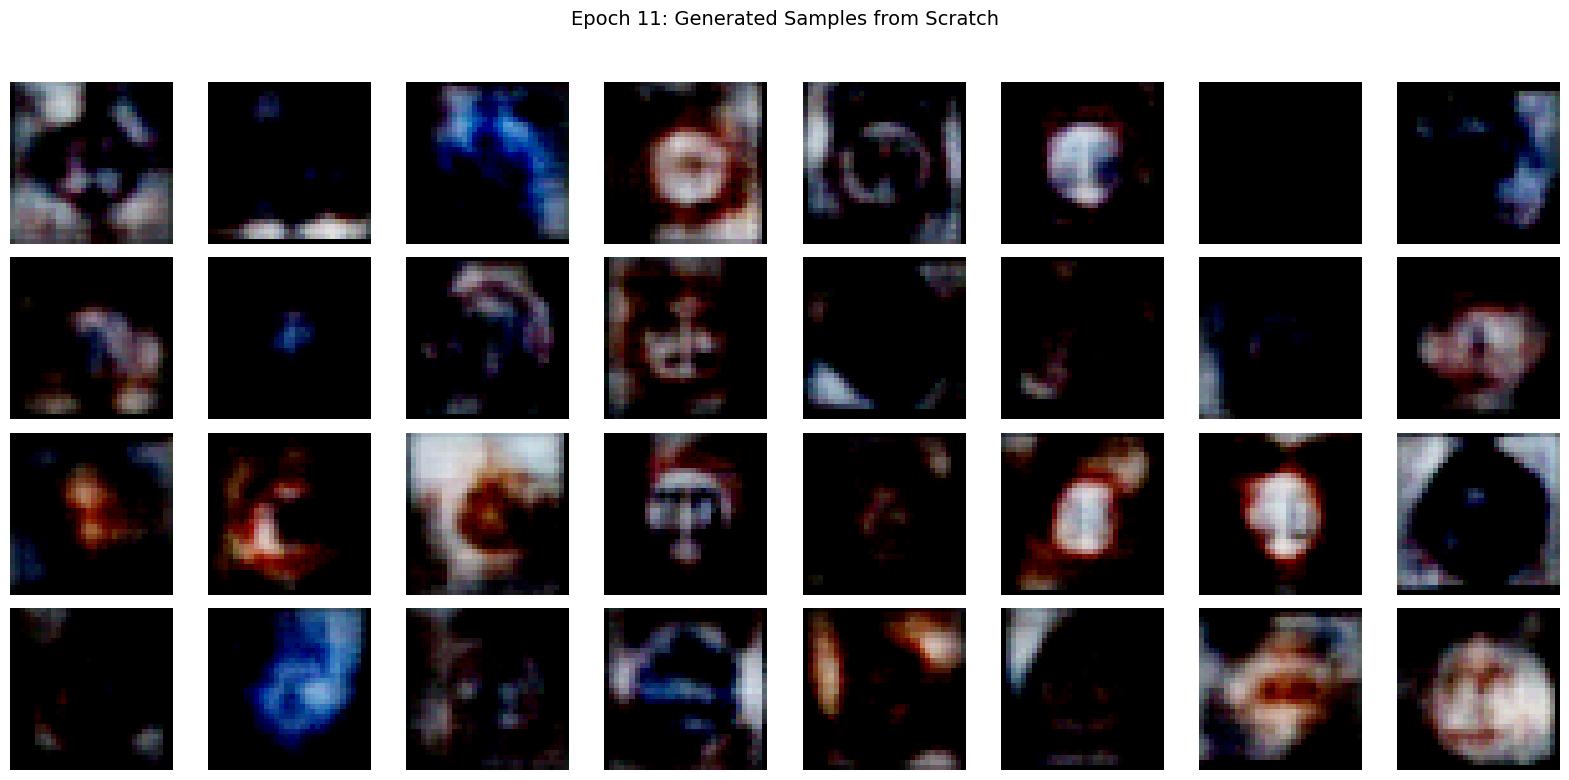

Epoch 11: 100%|██████████| 246/246 [00:18<00:00, 13.05it/s]


Epoch 12/20: Total Loss: 218.2102, Recon Loss: 166.9071, KLD Loss: 51.3031


Epoch 12: 100%|██████████| 246/246 [00:21<00:00, 11.20it/s]


Epoch 13/20: Total Loss: 213.6650, Recon Loss: 162.0449, KLD Loss: 51.6200


Epoch 13: 100%|██████████| 246/246 [00:21<00:00, 11.55it/s]


Epoch 14/20: Total Loss: 209.6408, Recon Loss: 157.6957, KLD Loss: 51.9451


Epoch 14: 100%|██████████| 246/246 [00:19<00:00, 12.54it/s]


Epoch 15/20: Total Loss: 206.3787, Recon Loss: 154.0706, KLD Loss: 52.3082


Epoch 15: 100%|██████████| 246/246 [00:21<00:00, 11.35it/s]


Epoch 16/20: Total Loss: 202.8218, Recon Loss: 150.2741, KLD Loss: 52.5477


Epoch 16: 100%|██████████| 246/246 [00:17<00:00, 13.70it/s]


Epoch 17/20: Total Loss: 200.5832, Recon Loss: 147.5935, KLD Loss: 52.9897


Epoch 17: 100%|██████████| 246/246 [00:21<00:00, 11.35it/s]


Epoch 18/20: Total Loss: 197.8916, Recon Loss: 144.6845, KLD Loss: 53.2071


Epoch 18: 100%|██████████| 246/246 [00:18<00:00, 13.44it/s]


Epoch 19/20: Total Loss: 195.7633, Recon Loss: 142.2973, KLD Loss: 53.4660


Epoch 19: 100%|██████████| 246/246 [00:21<00:00, 11.45it/s]

Epoch 20/20: Total Loss: 193.3978, Recon Loss: 139.7016, KLD Loss: 53.6963


{'total_losses': [745.6937812867203,
  451.49183183375413,
  364.9940614777852,
  320.92239355071774,
  290.7565253032901,
  272.0425290363591,
  258.02024016341545,
  246.5866614861217,
  236.99923464147057,
  229.66741664235184,
  223.5444422155861,
  218.2102254852047,
  213.66496493952062,
  209.6408259073893,
  206.37872568766275,
  202.821794153229,
  200.5831981751977,
  197.89163983352785,
  195.76325914336414,
  193.3978301257622],
 'reconstruction_losses': [717.6199613741743,
  411.43915576469607,
  317.7528565569622,
  270.6906262529575,
  239.4489777107549,
  221.0631757906782,
  207.20971456388148,
  196.00043890728213,
  186.35082387536522,
  178.8604816343726,
  172.58282290823092,
  166.90714791150597,
  162.04493366024357,
  157.69573652065867,
  154.0705626883158,
  150.27410556824228,
  147.5935227308816,
  144.68453173133415,
  142.2972690303151,
  139.70157756650352],
 'kld_losses': [28.073819798652114,
  40.05267666607368,
  47.241204610685024,
  50.23176628981179

In [ ]:
# vae_trainer.fit(train_dl, num_epochs=20)
cvae_trainer.fit(train_dl, num_epochs=1)

## Save model

In [ ]:
import os
import torch

weights_dir = "./gnn/weights"

os.makedirs(weights_dir, exist_ok=True)

vae_model_path = os.path.join(weights_dir, "vae_model.pth")

torch.save(vae_model.state_dict(), vae_model_path)

print(f"VAE model weights saved to: {vae_model_path}")

## Load Dataset

In [61]:
test_dir = "./data/test"
test_ds = ImageFolder(test_dir)
len(test_ds), len(test_ds.classes)

(7842, 43)

In [ ]:
import os
import time
from torchvision.utils import save_image

results_id = time.time()
results_dir = f"./vae_results/{results_id}"
os.makedirs(results_dir, exist_ok=True)

mean_t = torch.tensor(train_mean).view(1, 3, 1, 1).to(device)
std_t = torch.tensor(train_std).view(1, 3, 1, 1).to(device)

vae_model.eval()

num_samples = len(test_ds)

with torch.no_grad():
    for i in range(num_samples):
        sample, label = test_ds[i]


        z = torch.randn(1, latent_dim, device=device)
        img = vae_model.decode(z)

        img = img * std_t + mean_t

        fname = os.path.join(results_dir, f"class_{label}_sample_{i}.jpg")
        save_image(img.clamp(0, 1), fname)


Calculate the FID between test set and generated images

In [63]:
from pytorch_fid.fid_score import calculate_fid_given_paths

test_flat_dir = "./data/test_flat"
generated_dir = results_dir

fid = calculate_fid_given_paths([test_flat_dir, generated_dir], batch_size, device, dims=2048, num_workers=1)

print(f"FID: {fid}")

100%|██████████| 62/62 [00:26<00:00,  2.33it/s]


FID: 174.11119017100322


In [64]:
# clean up


import shutil
import os

results_dir = f"./vae_results/{results_id}"

# Check if the directory exists before trying to remove it
if os.path.exists(results_dir):
    shutil.rmtree(results_dir)
    print(f"Directory {results_dir}_{results_id} have been removed.")
else:
    print(f"The directory {results_dir}_{results_id} does not exist.")

Directory ./vae_results/1747087190.9101372_1747087190.9101372 have been removed.
